In [20]:
import pandas as pd


In [21]:
dataset=pd.read_csv('insurance_pre.csv')


In [22]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)


In [23]:
dataset


,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [8]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [9]:
independent=dataset[['age', 'bmi', 'children',  'sex_male', 'smoker_yes']]

In [11]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [24]:
dependent=dataset[['charges']]

In [25]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  =train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='absolute_error',max_features="log2",splitter='best')
regressor=regressor.fit(X_train,Y_train)

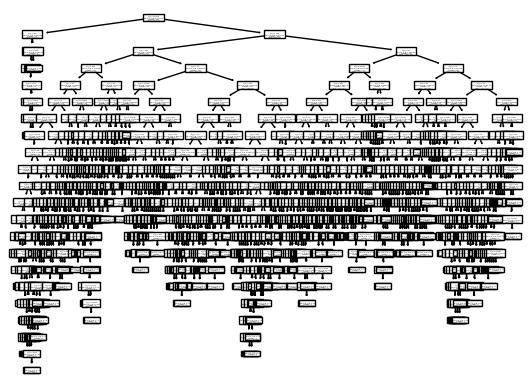

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [31]:
Y_pred=regressor.predict(X_test)



In [33]:
from sklearn.metrics import r2_score

r_score=r2_score(Y_test,Y_pred)

In [34]:
r_score

0.6220114432707605